In [361]:
import numpy as np
import control as ct
import sympy as sp
from matplotlib import pyplot as plt
%matplotlib inline

N = 5.5
plt.rcParams['figure.figsize'] = (N*1.285, N)
# plt.rcParams['figure.dpi'] = 140

In [150]:
def symTransferFunction(eq):
    s = sp.var('s')
    used_symbols = [str(l) for l in eq.free_symbols]
    if not len(used_symbols) == 1 or not "s" in used_symbols:
        raise Exception("invalid equation, please use correct transfer function equation (e.g. 1/(s**2+3))")
    n, d = sp.fraction(eq)
    num = sp.Poly(sp.expand(n), s).all_coeffs()
    den = sp.Poly(sp.expand(d), s).all_coeffs()
    num = [float(v) for v in num]
    den = [float(v) for v in den]
    
    return ct.TransferFunction(num, den)

In [151]:
sp.Poly(1+3, s)

Poly(4, s, domain='ZZ')

In [152]:
s = sp.var("s")
symTransferFunction(10.0/s/(2*s+5))


    10
-----------
2 s^2 + 5 s

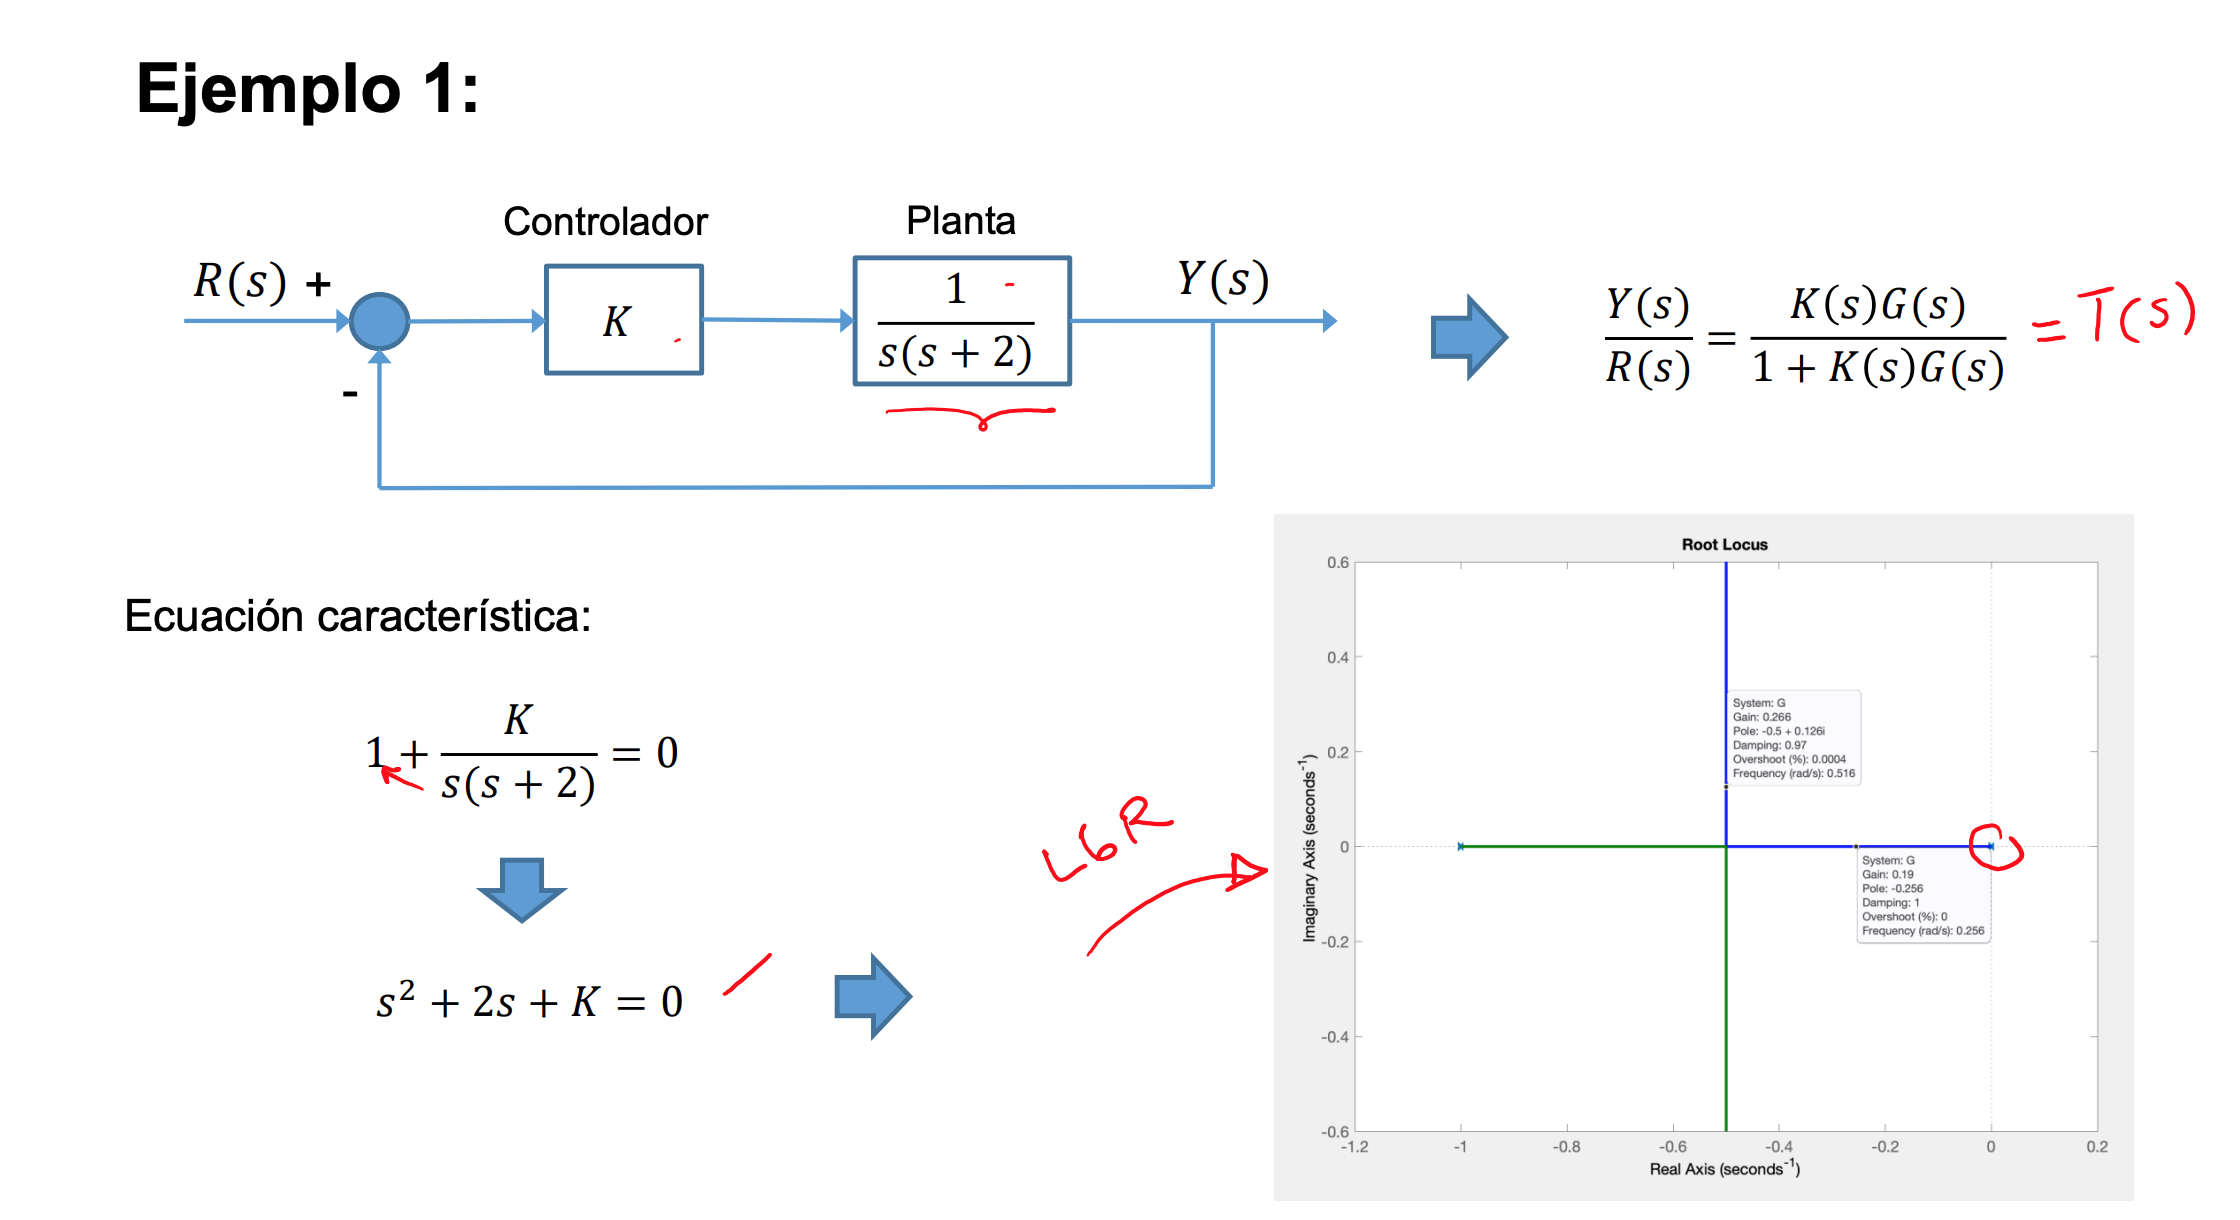

In [90]:
def extractCaracteristicEquation(K, G, H):
    num, _ = sp.fraction(sp.simplify(1 + K*G*H))
    return sp.expand(num) # == 0

In [519]:
def plot_root_locus(K, G, H, ki=0, kf=50, points=200):
    plt.title(f"Root locus of $G={sp.latex(G)}$", fontsize='x-large')
    plt.xlabel("$Real\ Axis\ [s^{-1}]$")
    plt.ylabel("$Imaginary\ Axis\ [s^{-1}]$")
    
    eq = extractCaracteristicEquation(K, G, H)
    s = sp.var("s")
    
    poles = sp.solve(eq, s) # a.k.a roots in function of K
    poles_points = [[complex(sp.N(p, chop=True).subs(K, k)) for k in np.linspace(ki, kf, points)] for p in poles]
    
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid()
    
    for pole in poles_points:
        # changing dimention
        reals, imags = [], []
        for point in pole:
            angle = np.angle(point)*2*180/2/np.pi
            reals.append(point.real)
            imags.append(point.imag)

        plt.plot(reals, imags)
    
    current_pole = [complex(sp.N(p, chop=True).subs(K, 0)) for p in poles] # K == 0
    reals, imags = [], []
    
    for point in current_pole:
        reals.append(float(point.real))
        imags.append(float(point.imag))

    plt.scatter(reals, imags)

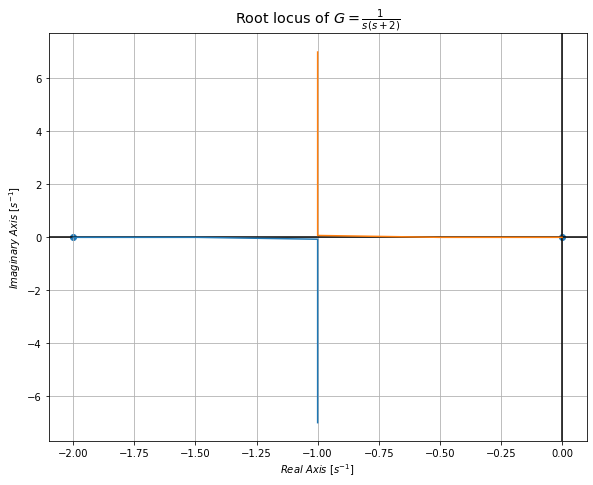

In [438]:
plot_root_locus(K, 1/s/(s+2), 1)

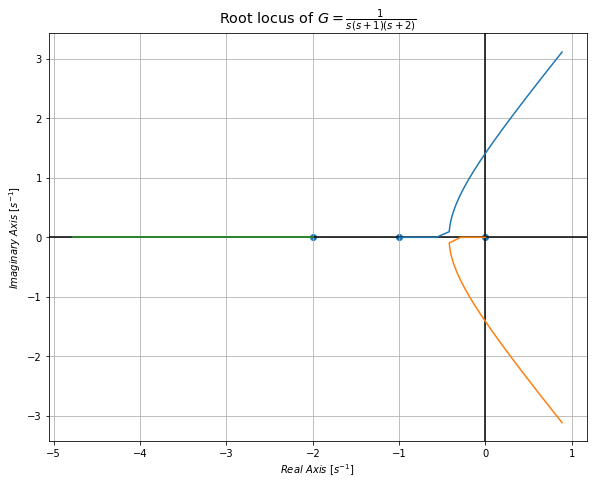

In [441]:
plot_root_locus(K, 1/s/(s+1)/(s+2), 1, points=1000)

In [ ]:
def info_point(c_point):
    if type(c_point) is not "complex":
        return
    
    alpha = np.angle(c_point)
    modulus = np.abs(c_point)
    
    

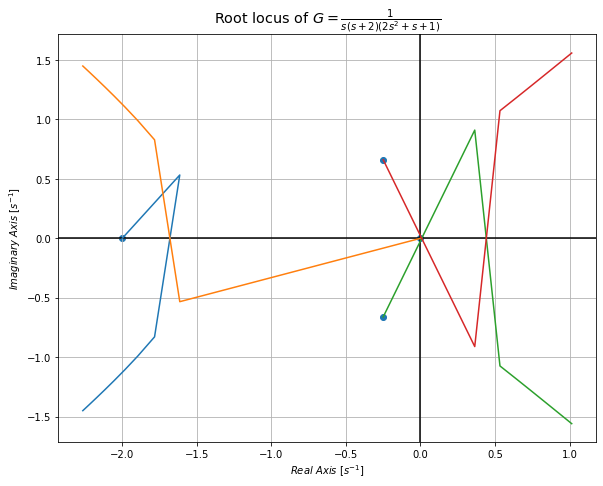

In [465]:
plot_root_locus(K, 1/s/(s+2*s**2+1)/(s+2), 1, points=10)

In [459]:
K, J, k, s = sp.var("K J k s")

G = K/J/s/(1+K*k/J/s)
G = G*(1/s)
G = sp.simplify(1+G)

display(G)
num, _ = sp.fraction(G)
sp.expand(num)

(K + s*(J*s + K*k))/(s*(J*s + K*k))

J*s**2 + K*k*s + K

In [464]:
extractCaracteristicEquation(K, 1/J/s/(1+K*k/J/s)*(1/s), 1)

J*s**2 + K*k*s + K

In [469]:
G = 1/s/(s+2*s**2+1)/(s+2)
eq = extractCaracteristicEquation(K, G, H)
s = sp.var("s")

# poles = sp.solve(eq, s) # a.k.a roots in function of K

In [568]:
def construct_poles(psi, wn):
    i_part = 1j*np.sqrt(1-psi**2)
    p1 = psi*wn + wn*i_part
    p2 = psi*wn - wn*i_part
    return [p1, p2]

def from_quality_to_psi_wn(po, ts):
    # po = percentage overshoot
    po_log = np.log(100/po)**2
    psi = np.sqrt(po_log/np.pi**2+po_log)
    wn = 4/psi/ts
    return psi, wn

def gain_to_poles(K, G, H, gain, once=-1):
    eq = extractCaracteristicEquation(K, G, H)
    s = sp.var("s")
    
    poles = sp.solve(eq, s) # a.k.a roots in function of K
    current_poles = [complex(sp.N(p, chop=True).subs(K, gain)) for p in poles] # K == 0
    
    return current_poles if once < 0 else current_poles[once % len(current_poles)]

def pole_to_psi_wn(pole):
    psi, wn = sp.var("psi w_n")
    
    pole = complex(pole)
    
    # p1 = psi*wn +/- j*wn*sqrt(1-psi^2)
    eq1 = sp.Eq(-psi*wn, pole.real)
    eq2 = sp.Eq(wn*sp.sqrt(1 - psi**2), pole.imag)
    
    result = sp.solve([eq1, eq2], (psi, wn))

    psi_v, wn_v = 0.0, 0.0
    
    if len(result) < 2:
        psi_v, wn_v = result[0]
    else:
        psi_v, wn_v = result[1]

    return float(psi_v), float(wn_v)

def c_num_report(pole):
    psi, wn = pole_to_psi_wn(pole)
    po = 100*np.exp(-psi*np.pi/np.sqrt(1-psi**2))
    
    print("Pole: %.3f + %.3fi"%(pole.real, pole.imag))
    print("Damping: %.3f"%psi)
    print("Overshoot (%%): %.0f"%po)
    print("Frequency (rad/s): %.3f"%wn)

In [603]:
c_num_report(2.16+5.37j)

Pole: 2.160 + 5.370i
Damping: -0.373
Overshoot (%): 354
Frequency (rad/s): 5.788


In [573]:
a = 2.3

In [576]:
a.

2.3